In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [ ]:
random.seed(41)
np.random.seed(41)

In [2]:
import pandas as pd

df = pd.read_csv('/content/bank_credit_scoring.csv')
display(df.head())

,Задолженность,"Просрочка, дни",Первоначльный лимит,BIRTHDATE,SEX,EDU,INCOME,TERM,Рейтинг кредитной истории,LV_AREA,LV_SETTLEMENTNAME,INDUSTRYNAME,PDN,CLIENTID,SCORINGMARK,UNDERAGECHILDRENCOUNT,VELCOMSCORING,FAMILYSTATUS
0,6063.50,3,7000.0,1983-07-08,Мужской,Среднее специальное,703.07,60,A1,Гомельская область,КОСАКОВКА,АПК,0.98,919517,233.0,0,NaN,1
1,3765.04,0,5000.0,1987-12-19,Женский,Высшее,1693.68,60,B2,NaN,МИНСК,Финансы и страхование,0.17,539353,NaN,1,NaN,1
2,2067.66,0,2650.0,1966-02-28,Женский,Среднее,724.49,60,C2,ГРОДНЕНСКАЯ,ЁДКИ,Медицина и здравоохранение,0.40,818913,NaN,0,NaN,2
3,2370.39,0,3000.0,1972-02-18,Женский,Среднее специальное,1045.84,60,A3,МИНСКАЯ,ФАНИПОЛЬ,Государственное управление,0.29,691598,216.0,0,NaN,2
4,2280.55,0,3000.0,1997-02-23,Женский,Высшее,1092.65,60,B3,NaN,Минск,Медицина и здравоохранение,0.63,425193,NaN,0,NaN,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18420 entries, 0 to 18419
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Задолженность              18420 non-null  float64
 1   Просрочка, дни             18420 non-null  int64  
 2   Первоначльный лимит        18420 non-null  float64
 3   BIRTHDATE                  18420 non-null  object 
 4   SEX                        18420 non-null  object 
 5   EDU                        18420 non-null  object 
 6   INCOME                     18420 non-null  float64
 7   TERM                       18420 non-null  int64  
 8   Рейтинг кредитной истории  17488 non-null  object 
 9   LV_AREA                    16297 non-null  object 
 10  LV_SETTLEMENTNAME          18374 non-null  object 
 11  INDUSTRYNAME               18420 non-null  object 
 12  PDN                        18420 non-null  float64
 13  CLIENTID                   18420 non-null  int

In [4]:
column_mapping = {
    'Задолженность': 'Debt',
    'Просрочка, дни': 'Overdue_Days',
    'Первоначльный лимит': 'Initial_Limit',
    'BIRTHDATE': 'Birth_Date',
    'SEX': 'Sex',
    'EDU': 'Education',
    'INCOME': 'Income',
    'TERM': 'Loan_Term',
    'Рейтинг кредитной истории': 'Credit_History_Rating',
    'LV_AREA': 'Living_Area',
    'LV_SETTLEMENTNAME': 'Settlement_Name',
    'INDUSTRYNAME': 'Industry_Name',
    'PDN': 'Probability_of_Default',
    'CLIENTID': 'Client_ID',
    'SCORINGMARK': 'Scoring_Mark',
    'UNDERAGECHILDRENCOUNT': 'Underage_Children_Count',
    'VELCOMSCORING': 'Velcom_Scoring',
    'FAMILYSTATUS': 'Family_Status'
}

df.rename(columns=column_mapping, inplace=True)

display(df.head())
df.info()

,Debt,Overdue_Days,Initial_Limit,Birth_Date,Sex,Education,Income,Loan_Term,Credit_History_Rating,Living_Area,Settlement_Name,Industry_Name,Probability_of_Default,Client_ID,Scoring_Mark,Underage_Children_Count,Velcom_Scoring,Family_Status
0,6063.50,3,7000.0,1983-07-08,Мужской,Среднее специальное,703.07,60,A1,Гомельская область,КОСАКОВКА,АПК,0.98,919517,233.0,0,NaN,1
1,3765.04,0,5000.0,1987-12-19,Женский,Высшее,1693.68,60,B2,NaN,МИНСК,Финансы и страхование,0.17,539353,NaN,1,NaN,1
2,2067.66,0,2650.0,1966-02-28,Женский,Среднее,724.49,60,C2,ГРОДНЕНСКАЯ,ЁДКИ,Медицина и здравоохранение,0.40,818913,NaN,0,NaN,2
3,2370.39,0,3000.0,1972-02-18,Женский,Среднее специальное,1045.84,60,A3,МИНСКАЯ,ФАНИПОЛЬ,Государственное управление,0.29,691598,216.0,0,NaN,2
4,2280.55,0,3000.0,1997-02-23,Женский,Высшее,1092.65,60,B3,NaN,Минск,Медицина и здравоохранение,0.63,425193,NaN,0,NaN,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18420 entries, 0 to 18419
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Debt                     18420 non-null  float64
 1   Overdue_Days             18420 non-null  int64  
 2   Initial_Limit            18420 non-null  float64
 3   Birth_Date               18420 non-null  object 
 4   Sex                      18420 non-null  object 
 5   Education                18420 non-null  object 
 6   Income                   18420 non-null  float64
 7   Loan_Term                18420 non-null  int64  
 8   Credit_History_Rating    17488 non-null  object 
 9   Living_Area              16297 non-null  object 
 10  Settlement_Name          18374 non-null  object 
 11  Industry_Name            18420 non-null  object 
 12  Probability_of_Default   18420 non-null  float64
 13  Client_ID                18420 non-null  int64  
 14  Scoring_Mark          

In [5]:
missing_values = df.isnull().sum()
display(missing_values)

,0
Debt,0
Overdue_Days,0
Initial_Limit,0
Birth_Date,0
Sex,0
Education,0
Income,0
Loan_Term,0
Credit_History_Rating,932
Living_Area,2123


In [6]:
change_col = ['Sex','Education','Living_Area','Industry_Name','Settlement_Name']
for col in change_col:
    print(col,':', df[col].unique())

Sex : ['Мужской' 'Женский']
Education : ['Среднее специальное' 'Высшее' 'Среднее' 'Неоконченное высшее'
 '**Послевузовское']
Living_Area : ['Гомельская область' nan 'ГРОДНЕНСКАЯ' 'МИНСКАЯ' 'БРЕСТСКАЯ' 'г. Минск'
 'ГОМЕЛЬСКАЯ' 'Минская область' 'Брестская область' 'Гродненская область'
 'Могилевская область' 'Витебская область' 'Г. МИНСК' 'ВИТЕБСКАЯ ОБЛАСТЬ'
 'ВИТЕБСКАЯ' 'Могилевская' 'МОГИЛЕВСКАЯ' 'МИНСКАЯ ОБЛАСТЬ'
 'ГОМЕЛЬСКАЯ ОБЛАСТЬ' 'МОГИЛЁВСКАЯ' 'Минская' 'БРЕСТСКАЯ ОБЛАСТЬ'
 'ГРОДНЕНСКАЯ ОБЛАСТЬ' 'МОГИЛЕВСКАЯ ОБЛАСТЬ' 'Витебская' 'Гомельская'
 'МИНСК' 'Брестская' 'Гродненская' 'ГОМЕЛЬСКАЯ ОБЛ' 'МОГИЛЕВСК']
Industry_Name : ['АПК' 'Финансы и страхование' 'Медицина и здравоохранение'
 'Государственное управление' 'Производство' 'Услуги населению'
 'Строительство' 'Торговля' 'Информационные технологии'
 'Транспорт/перевозки' 'Иное' 'Наука и образование' 'Спорт и туризм'
 'МВД/МЧС/МО' 'Культура и искусство' 'Пенсионер']
Settlement_Name : ['КОСАКОВКА' 'МИНСК' 'ЁДКИ' ... 'ДИВИН' 'Копцев

In [7]:
sex_map = {
    'Мужской': 'Male',
    'Женский': 'Female'
}
df['Sex'] = df['Sex'].map(sex_map)

education_map = {
    'Среднее специальное': 'Specialized Secondary',
    'Высшее': 'Higher',
    'Среднее': 'Secondary',
    'Неоконченное высшее': 'Incomplete Higher',
    '**Послевузовское': 'Postgraduate'
}
df['Education'] = df['Education'].map(education_map)

industry_map = {
    'АПК': 'Agro-Industrial Complex',
    'Финансы и страхование': 'Finance and Insurance',
    'Медицина и здравоохранение': 'Healthcare',
    'Государственное управление': 'Government Administration',
    'Производство': 'Manufacturing',
    'Услуги населению': 'Public Services',
    'Строительство': 'Construction',
    'Торговля': 'Trade',
    'Информационные технологии': 'Information Technology',
    'Транспорт/перевозки': 'Transport/Logistics',
    'Иное': 'Other',
    'Наука и образование': 'Science and Education',
    'Спорт и туризм': 'Sports and Tourism',
    'МВД/МЧС/МО': 'Law Enforcement/Emergency/Military',
    'Культура и искусство': 'Culture and Arts',
    'Пенсионер': 'Pensioner'
}
df['Industry_Name'] = df['Industry_Name'].map(industry_map)

living_area_map = {
    'Гомельская область': 'Gomel Region',
    'ГОМЕЛЬСКАЯ': 'Gomel Region',
    'ГОМЕЛЬСКАЯ ОБЛАСТЬ': 'Gomel Region',
    'Гомельская': 'Gomel Region',
    'ГОМЕЛЬСКАЯ ОБЛ': 'Gomel Region',
    'ГРОДНЕНСКАЯ': 'Grodno Region',
    'Гродненская область': 'Grodno Region',
    'Гродненская': 'Grodno Region',
    'ГРОДНЕНСКАЯ ОБЛАСТЬ': 'Grodno Region',
    'МИНСКАЯ': 'Minsk Region',
    'Минская область': 'Minsk Region',
    'Минская': 'Minsk Region',
    'МИНСКАЯ ОБЛАСТЬ': 'Minsk Region',
    'БРЕСТСКАЯ': 'Brest Region',
    'Брестская область': 'Brest Region',
    'Брестская': 'Brest Region',
    'БРЕСТСКАЯ ОБЛАСТЬ': 'Brest Region',
    'Могилевская область': 'Mogilev Region',
    'МОГИЛЕВСКАЯ': 'Mogilev Region',
    'МОГИЛЕВСКАЯ ОБЛАСТЬ': 'Mogilev Region',
    'МОГИЛЁВСКАЯ': 'Mogilev Region',
    'Могилевская': 'Mogilev Region',
    'МОГИЛЕВСК': 'Mogilev Region',
    'Витебская область': 'Vitebsk Region',
    'ВИТЕБСКАЯ ОБЛАСТЬ': 'Vitebsk Region',
    'ВИТЕБСКАЯ': 'Vitebsk Region',
    'Витебская': 'Vitebsk Region',
    'г. Минск': 'Minsk City',
    'Г. МИНСК': 'Minsk City',
    'МИНСК': 'Minsk City'
}
df['Living_Area'] = df['Living_Area'].map(living_area_map)

In [8]:
target = df[df.columns[1]]  # 'Просрочка, дни' feature
target.sort_values(ascending=True)

,Overdue_Days
28,0
27,0
26,0
25,0
24,0
...,...
581,460
366,460
3725,491
3930,491


In [9]:
from sklearn.preprocessing import LabelEncoder

# Create the binary target variable 'OVERDUE'
df['OVERDUE'] = (df['Overdue_Days'] >= 90)

# Initialize LabelEncoder
le = LabelEncoder()

# Convert boolean 'OVERDUE' column to 0s and 1s
df['OVERDUE'] = le.fit_transform(df['OVERDUE'])

# Display the value counts of the new target variable and first few rows
display(df['OVERDUE'].value_counts())
display(df.head())

,count
OVERDUE,
0,17665
1,755


,Debt,Overdue_Days,Initial_Limit,Birth_Date,Sex,Education,Income,Loan_Term,Credit_History_Rating,Living_Area,Settlement_Name,Industry_Name,Probability_of_Default,Client_ID,Scoring_Mark,Underage_Children_Count,Velcom_Scoring,Family_Status,OVERDUE
0,6063.50,3,7000.0,1983-07-08,Male,Specialized Secondary,703.07,60,A1,Gomel Region,КОСАКОВКА,Agro-Industrial Complex,0.98,919517,233.0,0,NaN,1,0
1,3765.04,0,5000.0,1987-12-19,Female,Higher,1693.68,60,B2,NaN,МИНСК,Finance and Insurance,0.17,539353,NaN,1,NaN,1,0
2,2067.66,0,2650.0,1966-02-28,Female,Secondary,724.49,60,C2,Grodno Region,ЁДКИ,Healthcare,0.40,818913,NaN,0,NaN,2,0
3,2370.39,0,3000.0,1972-02-18,Female,Specialized Secondary,1045.84,60,A3,Minsk Region,ФАНИПОЛЬ,Government Administration,0.29,691598,216.0,0,NaN,2,0
4,2280.55,0,3000.0,1997-02-23,Female,Higher,1092.65,60,B3,NaN,Минск,Healthcare,0.63,425193,NaN,0,NaN,2,0


In [10]:
df['Sex'].value_counts()

,count
Sex,
Male,11249
Female,7171


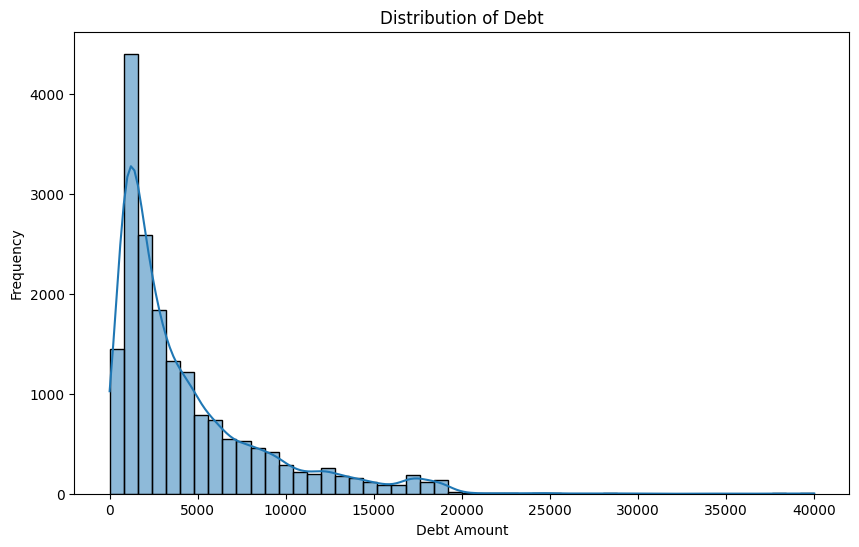

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Debt
plt.figure(figsize=(10, 6))
sns.histplot(df['Debt'], bins=50, kde=True)
plt.title('Distribution of Debt')
plt.xlabel('Debt Amount')
plt.ylabel('Frequency')
plt.show()

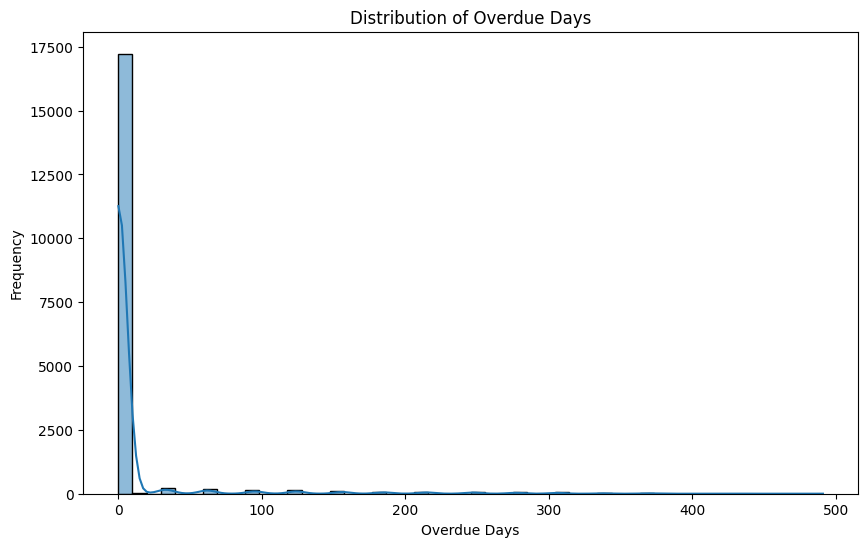

In [12]:
# Distribution of Overdue_Days
plt.figure(figsize=(10, 6))
sns.histplot(df['Overdue_Days'], bins=50, kde=True)
plt.title('Distribution of Overdue Days')
plt.xlabel('Overdue Days')
plt.ylabel('Frequency')
plt.show()

Now, let's visualize the distribution for customers whose `Overdue_Days` are greater than or equal to 90.

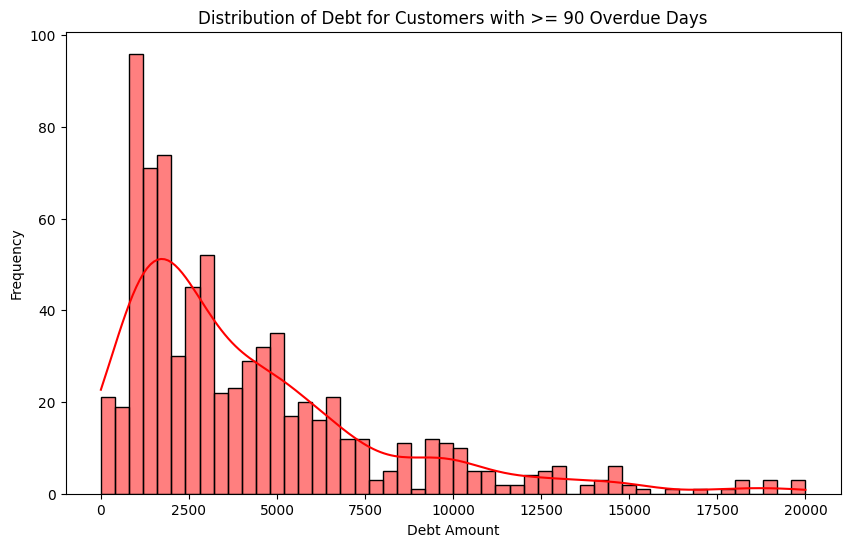

In [13]:
df_overdue_90 = df[df['Overdue_Days'] >= 90]

# Distribution of Debt for Overdue_Days >= 90
plt.figure(figsize=(10, 6))
sns.histplot(df_overdue_90['Debt'], bins=50, kde=True, color='red')
plt.title('Distribution of Debt for Customers with >= 90 Overdue Days')
plt.xlabel('Debt Amount')
plt.ylabel('Frequency')
plt.show()

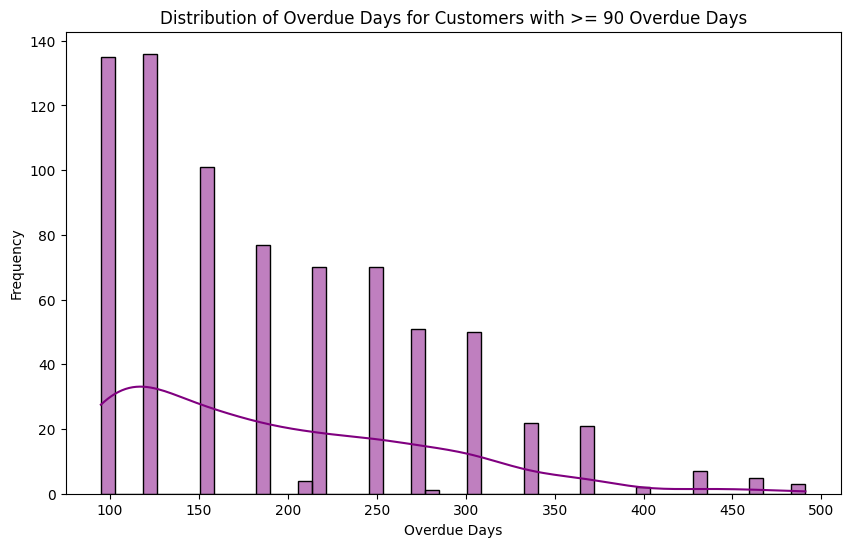

In [14]:
# Distribution of Overdue_Days for Overdue_Days >= 90
plt.figure(figsize=(10, 6))
sns.histplot(df_overdue_90['Overdue_Days'], bins=50, kde=True, color='purple')
plt.title('Distribution of Overdue Days for Customers with >= 90 Overdue Days')
plt.xlabel('Overdue Days')
plt.ylabel('Frequency')
plt.show()

In [15]:
df['Birth_Date'] = pd.to_datetime(df['Birth_Date'])
current_date = pd.to_datetime('today')
df['Age'] = (current_date - df['Birth_Date']).dt.days // 365
display(df[['Birth_Date', 'Age']].head())


,Birth_Date,Age
0,1983-07-08,42
1,1987-12-19,37
2,1966-02-28,59
3,1972-02-18,53
4,1997-02-23,28


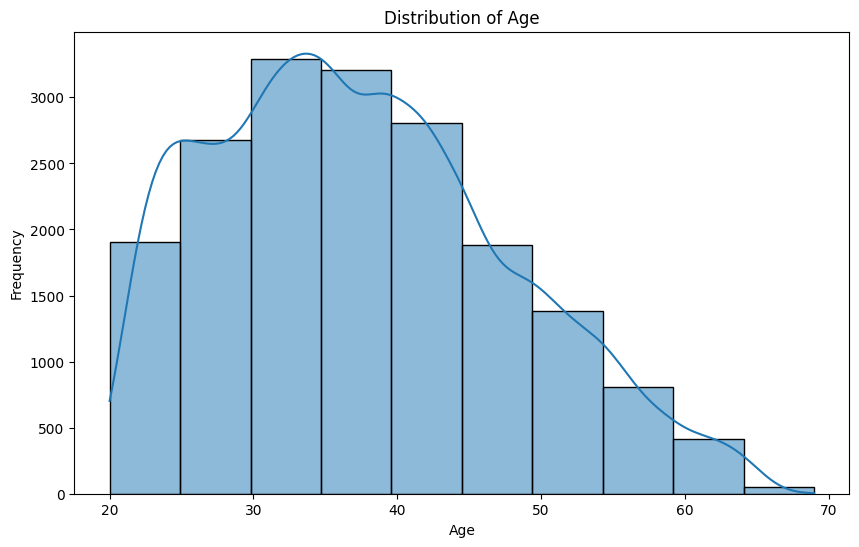

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [17]:
df['Education'].value_counts()

,count
Education,
Specialized Secondary,9196
Higher,6140
Secondary,2519
Incomplete Higher,555
Postgraduate,10


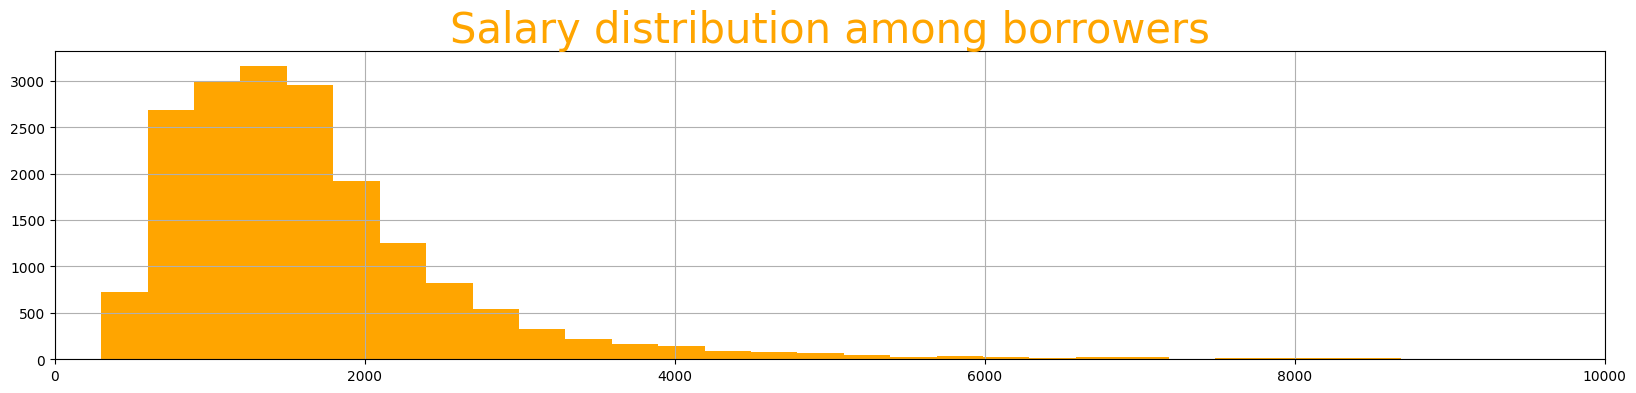

In [18]:
plt.figure(figsize=(20, 4))
df['Income'].hist(bins=100, color='orange')
plt.xlim((0, 10000))
plt.title(label='Salary distribution among borrowers', color='orange', fontsize=30);

In [19]:
df['Credit_History_Rating'].value_counts().sort_index()

,count
Credit_History_Rating,
-1,4
A1,777
A2,640
A3,996
B1,1335
B2,1701
B3,2154
C1,2080
C2,2012


In [20]:
df.loc[df['Credit_History_Rating'] == '-1']

,Debt,Overdue_Days,Initial_Limit,Birth_Date,Sex,Education,Income,Loan_Term,Credit_History_Rating,Living_Area,Settlement_Name,Industry_Name,Probability_of_Default,Client_ID,Scoring_Mark,Underage_Children_Count,Velcom_Scoring,Family_Status,OVERDUE,Age
3257,1021.13,0,2000.0,2000-03-24,Male,Higher,1056.07,36,-1,Vitebsk Region,НОВОСЕЛКИ,Science and Education,0.08,544748,NaN,0,NaN,2,0,25
3404,988.79,0,2000.0,2002-07-14,Female,Secondary,1283.34,36,-1,NaN,МИНСК,Manufacturing,0.07,775360,NaN,0,NaN,2,0,23
5628,773.37,247,1000.0,2003-08-30,Male,Specialized Secondary,823.39,36,-1,Grodno Region,НОВОГРУДОК,Manufacturing,0.05,549474,52.0,0,NaN,2,1,22
5860,1595.26,306,3000.0,1963-01-06,Male,Specialized Secondary,514.48,36,-1,Minsk Region,ХОЛХОЛИЦА,Agro-Industrial Complex,0.25,798407,NaN,0,NaN,1,1,62


In [21]:
df['Living_Area'].value_counts()

,count
Living_Area,
Minsk City,4296
Minsk Region,3483
Vitebsk Region,1991
Gomel Region,1825
Brest Region,1770
Mogilev Region,1658
Grodno Region,1274


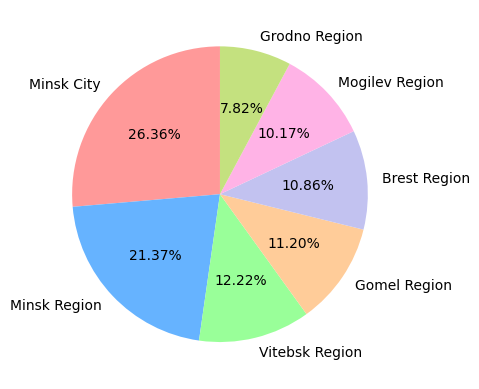

In [22]:
area = df['Living_Area'].value_counts()
# Define a list of colors for the pie chart
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c4e17f']
plt.pie(x=area, labels=area.index, autopct='%1.2f%%', startangle=90, colors=colors[:len(area)]);

In [23]:
df['Settlement_Name'].value_counts()[:20]

,count
Settlement_Name,
МИНСК,3775
Минск,1268
МОГИЛЕВ,663
ГОМЕЛЬ,642
ВИТЕБСК,589
БРЕСТ,445
ГРОДНО,430
БОРИСОВ,245
БОБРУЙСК,217


In [24]:
df['Settlement_Name'] = df['Settlement_Name'].str.capitalize()
df['Settlement_Name'].value_counts()[:25]

,count
Settlement_Name,
Минск,5043
Могилев,780
Гомель,751
Витебск,676
Брест,541
Гродно,505
Борисов,290
Барановичи,248
Бобруйск,239


In [25]:
top_15_cities = df['Settlement_Name'].value_counts().index[:15]
filtered_data = df[df['Settlement_Name'].isin(top_15_cities)]

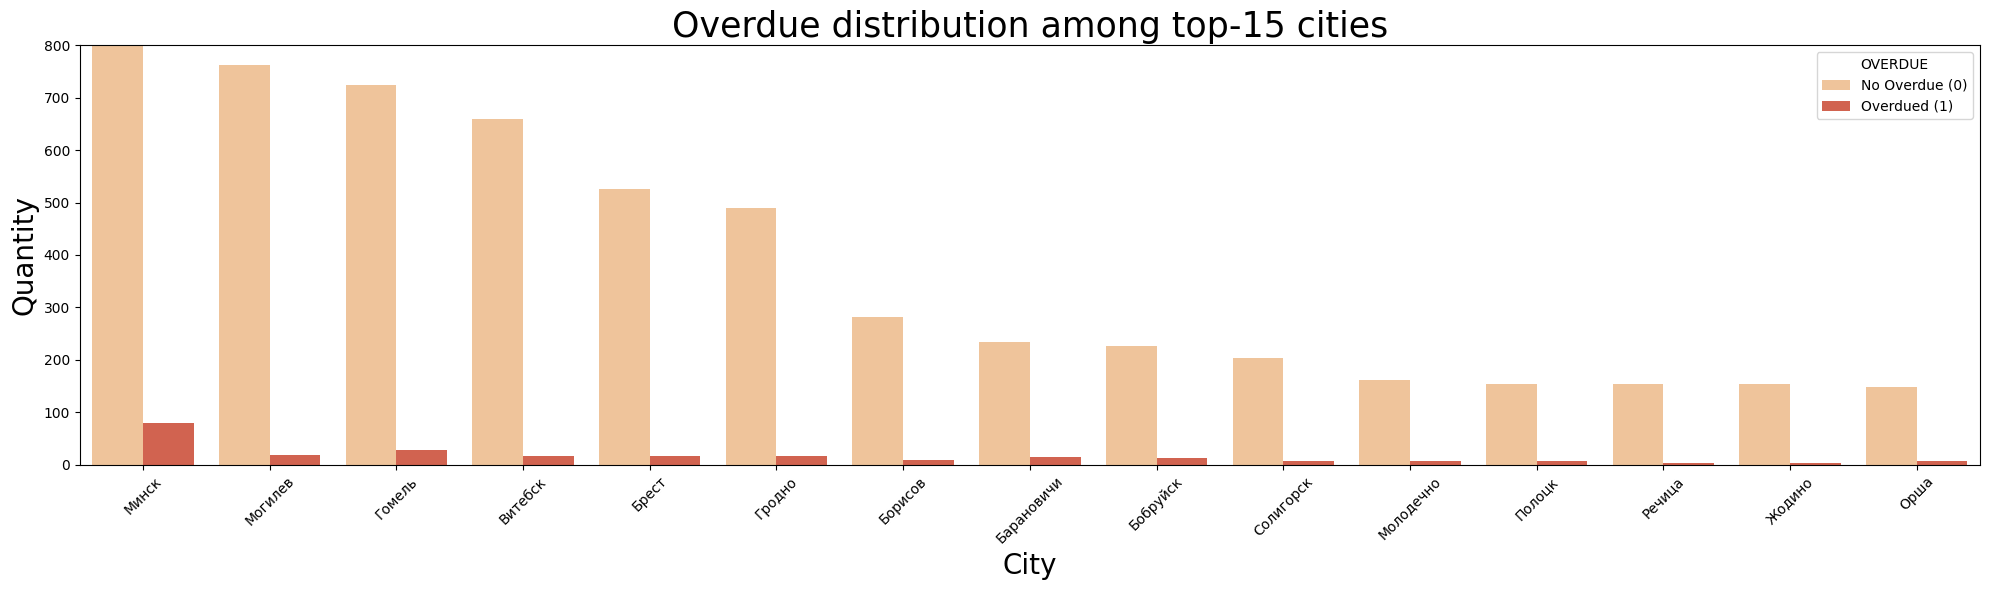

In [26]:
plt.figure(figsize=(20, 6))
sns.countplot(data=filtered_data, x='Settlement_Name', hue='OVERDUE', palette='OrRd', order=top_15_cities)
plt.title('Overdue distribution among top-15 cities', fontsize=25)
plt.xlabel('City', fontsize=20)
plt.ylabel('Quantity', fontsize=20)
plt.ylim((0, 800))
plt.xticks(rotation=45)
plt.legend(title='OVERDUE', labels=['No Overdue (0)', 'Overdued (1)'])
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

In [27]:
df['Industry_Name'].value_counts()

,count
Industry_Name,
Manufacturing,4323
Trade,3100
Agro-Industrial Complex,1858
Public Services,1166
Construction,1154
Science and Education,1150
Transport/Logistics,1077
Law Enforcement/Emergency/Military,1053
Healthcare,981


In [28]:
sum(df['Client_ID'].value_counts() > 1)

2118

In [29]:
df['Took_Multiple_Loan'] = df['Client_ID'].map(df['Client_ID'].value_counts() > 1).astype(int)
display(df[['Client_ID', 'Took_Multiple_Loan']].head())
display(df['Took_Multiple_Loan'].value_counts())

,Client_ID,Took_Multiple_Loan
0,919517,0
1,539353,1
2,818913,0
3,691598,0
4,425193,0


,count
Took_Multiple_Loan,
0,12713
1,5707


In [30]:
df['Family_Status'].value_counts()

,count
Family_Status,
1,9241
2,9172
3,6
4,1


In [31]:
df['Underage_Children_Count'].value_counts()

,count
Underage_Children_Count,
0,10559
1,4714
2,2426
3,721


In [32]:
df.isnull().sum()

,0
Debt,0
Overdue_Days,0
Initial_Limit,0
Birth_Date,0
Sex,0
Education,0
Income,0
Loan_Term,0
Credit_History_Rating,932
Living_Area,2123


In [33]:
df['Settlement_Name'].fillna(df['Settlement_Name'].mode()[0], inplace=True)
df['Living_Area'].fillna('Unknown', inplace=True)
df['Scoring_Mark'].fillna(-999, inplace=True)
df['Credit_History_Rating'].fillna('MISSING', inplace=True)

df['Has_Velcom_Scoring'] = df['Velcom_Scoring'].notnull().astype(int)
df.drop('Velcom_Scoring', axis=1, inplace=True)

display(df.isnull().sum())

,0
Debt,0
Overdue_Days,0
Initial_Limit,0
Birth_Date,0
Sex,0
Education,0
Income,0
Loan_Term,0
Credit_History_Rating,0
Living_Area,0


Model (Sonsuz değerler temizlendi) eğitiliyor...

BİZİM MODEL (Gini)          : 0.8962
MEVCUT BANKA SKORU (Gini)   : -0.2261
SONUÇ: Büyük farkla kazandık! Yeni değişkenler işe yaradı.


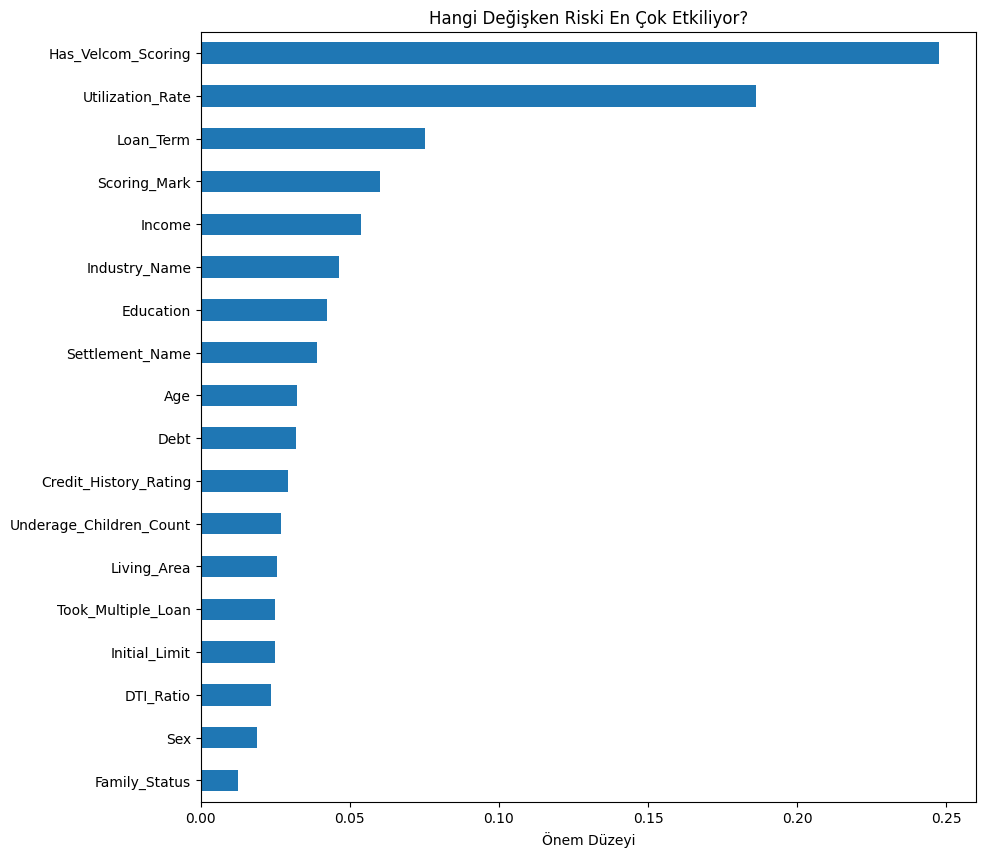

In [38]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

# --- DÜZELTME ADIMI BAŞLANGICI ---
# Sonsuz (inf) değerleri NaN (Not a Number) ile değiştiriyoruz.
# XGBoost NaN değerleri yönetebilir.
df_model = df_model.replace([np.inf, -np.inf], np.nan)
# ---------------------------------

# 1. Kategorik Değişkenleri Belirleme
cat_cols = ['Sex', 'Education', 'Living_Area', 'Settlement_Name', 'Industry_Name', 'Credit_History_Rating']

# 2. Encoding (Garanti olsun diye tekrar yapıyoruz)
le = LabelEncoder()
for col in cat_cols:
    df_model[col] = df_model[col].astype(str).fillna("Unknown")
    df_model[col] = le.fit_transform(df_model[col])

# 3. EKSİKSİZ ÖZELLİK LİSTESİ
features_all = [
    'Debt', 'Initial_Limit', 'Income', 'Age',
    'Utilization_Rate', 'DTI_Ratio',
    'Took_Multiple_Loan', 'Loan_Term', 'Family_Status', 'Underage_Children_Count',
    'Has_Velcom_Scoring', 'Scoring_Mark', # Eksik olanlar eklendi
    'Sex', 'Education', 'Living_Area', 'Settlement_Name', 'Industry_Name', 'Credit_History_Rating'
]

X_all = df_model[features_all]
y = df_model['OVERDUE']
benchmark_scores = df_model['Probability_of_Default']

# 4. Train-Test Split
X_train, X_test, y_train, y_test, bench_train, bench_test = train_test_split(
    X_all, y, benchmark_scores, test_size=0.20, random_state=42, stratify=y
)

# 5. Model Kurulumu
pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)

xgb_full = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    scale_pos_weight=pos_weight,
    random_state=42,
    eval_metric='auc',
    missing=np.nan # Eksik verileri (NaN) otomatik yönetmesini söylüyoruz
)

print("Model (Sonsuz değerler temizlendi) eğitiliyor...")
xgb_full.fit(X_train, y_train)

# 6. Performans Karşılaştırması
y_pred_prob_full = xgb_full.predict_proba(X_test)[:, 1]

auc_score_full = roc_auc_score(y_test, y_pred_prob_full)
gini_score_full = 2 * auc_score_full - 1

auc_bench = roc_auc_score(y_test, bench_test)
gini_bench = 2 * auc_bench - 1

print("\n" + "="*40)
print(f"BİZİM MODEL (Gini)          : {gini_score_full:.4f}")
print(f"MEVCUT BANKA SKORU (Gini)   : {gini_bench:.4f}")
print("="*40)

if gini_score_full > gini_bench:
    print("SONUÇ: Büyük farkla kazandık! Yeni değişkenler işe yaradı.")
else:
    print("SONUÇ: Mevcut skor hala çok güçlü.")

# 7. Feature Importance
plt.figure(figsize=(10, 10))
feature_imp_full = pd.Series(xgb_full.feature_importances_, index=X_all.columns).sort_values(ascending=True)
feature_imp_full.plot(kind='barh', color='#1f77b4')
plt.title("Hangi Değişken Riski En Çok Etkiliyor?")
plt.xlabel("Önem Düzeyi")
plt.show()


DETAYLI SINIFLANDIRMA RAPORU
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3533
           1       0.50      0.75      0.60       151

    accuracy                           0.96      3684
   macro avg       0.74      0.86      0.79      3684
weighted avg       0.97      0.96      0.96      3684



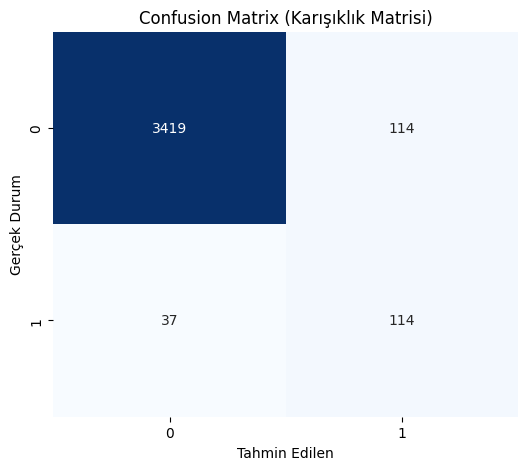

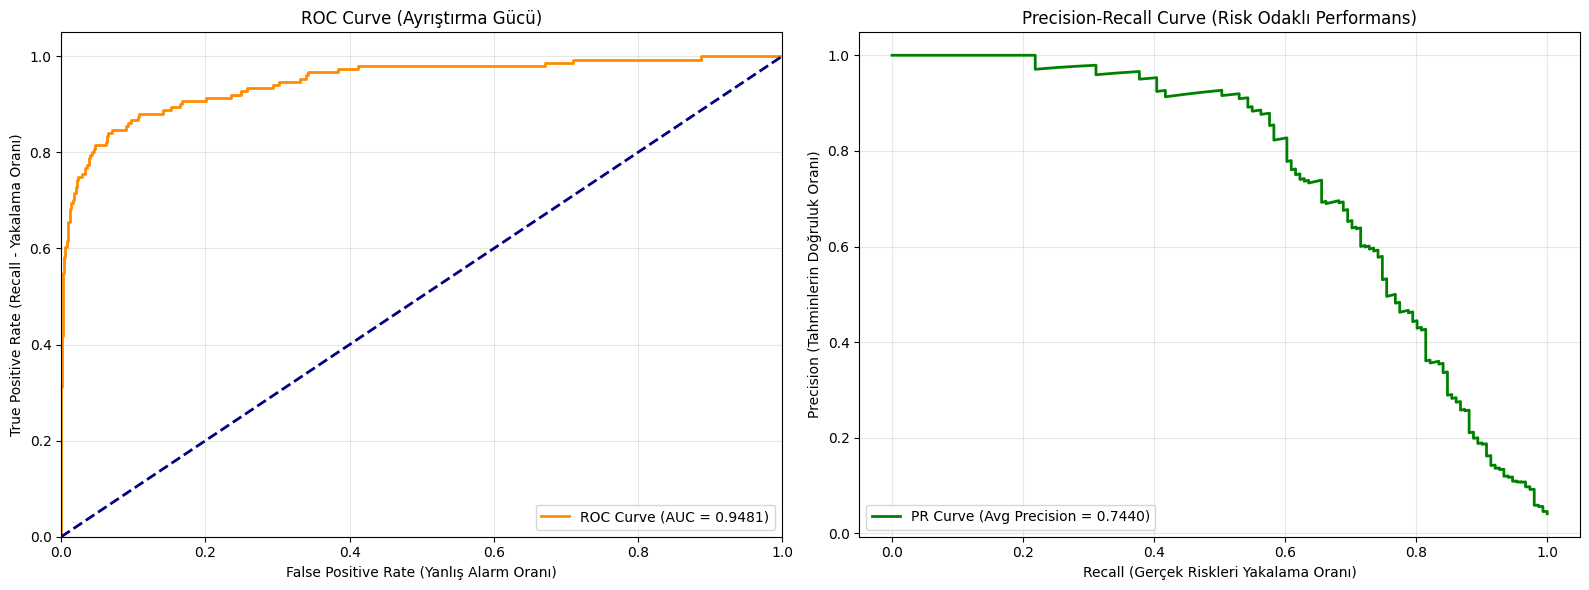

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Tahminleri Hazırlama
# Olasılıklar (0-1 arası)
y_pred_prob = xgb_full.predict_proba(X_test)[:, 1]
# Sınıf Tahminleri (0 veya 1) - Eşik değeri 0.5 alıyoruz
y_pred = (y_pred_prob > 0.5).astype(int)

# --- A. SAYISAL RAPORLAR ---
print("\n" + "="*40)
print("DETAYLI SINIFLANDIRMA RAPORU")
print("="*40)
# Precision, Recall, F1-Score hepsini gösterir
print(classification_report(y_test, y_pred))

# Karışıklık Matrisi (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix (Karışıklık Matrisi)")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Durum")
plt.show()

# --- B. GRAFİKSEL METRİKLER (ROC & PR CURVE) ---

# Grafik Alanı Oluşturma (Yan yana 2 grafik)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 1. ROC Eğrisi (Receiver Operating Characteristic)
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Rastgele tahmin çizgisi
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate (Yanlış Alarm Oranı)')
ax1.set_ylabel('True Positive Rate (Recall - Yakalama Oranı)')
ax1.set_title('ROC Curve (Ayrıştırma Gücü)')
ax1.legend(loc="lower right")
ax1.grid(True, alpha=0.3)

# 2. Precision-Recall Eğrisi (Dengesiz Veriler İçin Kritik)
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)
avg_precision = average_precision_score(y_test, y_pred_prob)

ax2.plot(recall, precision, color='green', lw=2, label=f'PR Curve (Avg Precision = {avg_precision:.4f})')
ax2.set_xlabel('Recall (Gerçek Riskleri Yakalama Oranı)')
ax2.set_ylabel('Precision (Tahminlerin Doğruluk Oranı)')
ax2.set_title('Precision-Recall Curve (Risk Odaklı Performans)')
ax2.legend(loc="lower left")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

EWS Analizi için Kalan Müşteri Sayısı: 17665
EWS Sinyali Veren (Riskli) Müşteri Sayısı: 426
EWS Modeli eğitiliyor...

EWS MODEL PERFORMANSI
              precision    recall  f1-score   support

           0       0.99      0.83      0.91      3448
           1       0.10      0.75      0.18        85

    accuracy                           0.83      3533
   macro avg       0.55      0.79      0.54      3533
weighted avg       0.97      0.83      0.89      3533

EWS AUC Skoru: 0.8592


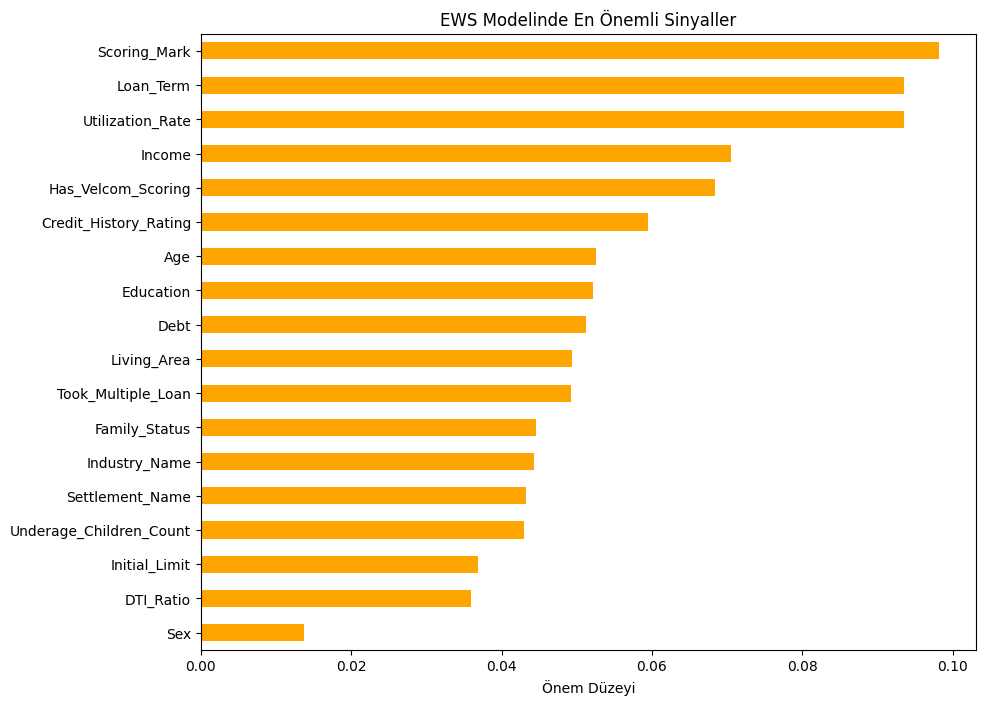

In [40]:
# ==========================================
# AŞAMA 4: EWS (EARLY WARNING SYSTEM) MODELİ
# ==========================================

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. EWS için Veri Setini Hazırlama
# Kural: Zaten Default (Overdue > 90) olanları analizden çıkarıyoruz.
# Çünkü EWS'nin amacı, henüz batmamış ama batma sinyali verenleri (30-90 gün) bulmaktır.

# Sadece 'Temiz' (0-30 gün) ve 'EWS' (31-90 gün) müşterilerini alıyoruz.
# Zaten 'OVERDUE' değişkeni 1 olanlar (90+ gün) eleniyor.
df_ews = df_model[df_model['OVERDUE'] == 0].copy()

print(f"EWS Analizi için Kalan Müşteri Sayısı: {len(df_ews)}")
print(f"EWS Sinyali Veren (Riskli) Müşteri Sayısı: {df_ews['TARGET_EWS'].sum()}")

# 2. Özellikler ve Hedef
# Aynı özellikleri kullanabiliriz ama hedefimiz artık TARGET_EWS
X_ews = df_ews[features_all]
y_ews = df_ews['TARGET_EWS']

# 3. Train-Test Split
X_train_ews, X_test_ews, y_train_ews, y_test_ews = train_test_split(
    X_ews, y_ews, test_size=0.20, random_state=42, stratify=y_ews
)

# 4. EWS Model Kurulumu
# EWS sinyali verenler de azınlıkta olduğu için yine scale_pos_weight kullanıyoruz.
pos_weight_ews = (len(y_train_ews) - sum(y_train_ews)) / sum(y_train_ews)

xgb_ews = XGBClassifier(
    n_estimators=100,
    learning_rate=0.05, # EWS daha hassas olduğu için öğrenme hızını biraz düşürdük (daha muhafazakar öğrensin)
    max_depth=4,
    scale_pos_weight=pos_weight_ews,
    random_state=42,
    eval_metric='auc',
    missing=np.nan
)

print("EWS Modeli eğitiliyor...")
xgb_ews.fit(X_train_ews, y_train_ews)

# 5. Performans Değerlendirme
y_pred_ews = xgb_ews.predict(X_test_ews)
y_prob_ews = xgb_ews.predict_proba(X_test_ews)[:, 1]

print("\n" + "="*40)
print("EWS MODEL PERFORMANSI")
print("="*40)
print(classification_report(y_test_ews, y_pred_ews))
print(f"EWS AUC Skoru: {roc_auc_score(y_test_ews, y_prob_ews):.4f}")

# 6. EWS İçin En Önemli Sinyaller
plt.figure(figsize=(10, 8))
pd.Series(xgb_ews.feature_importances_, index=X_ews.columns).sort_values().plot(kind='barh', color='orange')
plt.title("EWS Modelinde En Önemli Sinyaller")
plt.xlabel("Önem Düzeyi")
plt.show()